In [1]:
# Packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(42)

In [4]:
# Population
df = pd.read_excel('nba_ht_wt.xls')
df.head()

,Player,Pos,Height,Weight,Age,School,BDate
0,Vitor Faverani,C,83,260,25,None,1988-05-05
1,Avery Bradley,G,74,180,22,Texas,1990-11-26
2,Keith Bogans,G,77,215,33,Kentucky,1980-05-12
3,Jared Sullinger,F,81,260,21,Ohio State,1992-03-04
4,Jeff Green,F,81,235,27,Georgetown,1986-08-28


In [5]:
df.shape

(505, 7)

In [6]:
df = df[['Weight']]
df.head()

,Weight
0,260
1,180
2,215
3,260
4,235


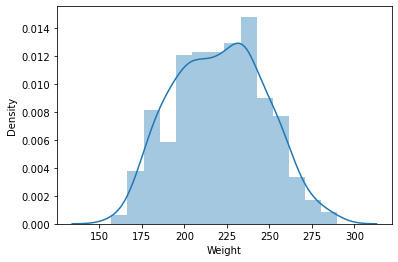

In [7]:
sns.distplot(df.Weight)
plt.show()

In [8]:
df.Weight.mean()

220.67326732673268

This is the true mean weight of the population. This is the population parameter, the ground truth.  

Let's take a random sample from this data, and see what mean we get.

In [9]:
samp_size = 50

In [10]:
df.Weight.sample(samp_size).mean()

223.1

Quite different from the population mean, right?  
Let's take another sample.

In [11]:
df.Weight.sample(samp_size).mean()

221.38

And another.

In [12]:
df.Weight.sample(samp_size).mean()

218.04

Each time we take a sample, our mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let's assess this.   
We'll take many samples from the data, and plot a histogram of the same.

In [13]:
sample_means = [df.Weight.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

In [14]:
sample_means

0      222.74
1      219.60
2      218.40
3      220.18
4      216.48
        ...  
995    225.86
996    219.04
997    222.38
998    222.24
999    220.60
Length: 1000, dtype: float64

In [15]:
len(sample_means)

1000

Plotting the density for the sample means.

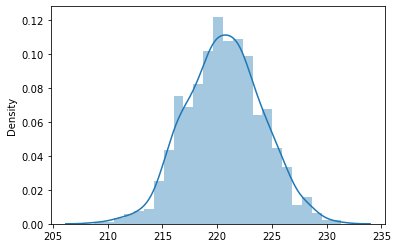

In [16]:
sns.distplot(sample_means)
plt.show()

Which distribution does this look like?

In [17]:
sample_means.mean()

220.64932

In [18]:
sample_means.std()

3.4776043002718517

In [19]:
sample_means.describe()

count    1000.000000
mean      220.649320
std         3.477604
min       208.800000
25%       218.315000
50%       220.600000
75%       222.960000
max       231.360000
dtype: float64

Population std vs. std of sampling mean

In [20]:
df.Weight.std()/np.sqrt(samp_size)

3.767904817092793

Let's make sure we got this right.
 - What happened here?
 - What is a sampling distribution
 - What is expected to follow a normal distribution?

In [21]:
sample_means

0      222.74
1      219.60
2      218.40
3      220.18
4      216.48
        ...  
995    225.86
996    219.04
997    222.38
998    222.24
999    220.60
Length: 1000, dtype: float64

#### Claim: This phenomenon occurs, rather, this theorem holds regardless of the underying populations distribution.
That seems very far fetched. We'll need to see it to believe it.

In [22]:
df1 = pd.read_csv("exp_data.csv")

In [23]:
df1.head()

,VAL
0,362
1,361
2,360
3,359
4,358


In [24]:
df1.shape

(1112, 1)

In [25]:
df1.VAL.describe()

count    1112.000000
mean      130.418165
std        99.422448
min        29.000000
25%        40.000000
50%        92.000000
75%       205.500000
max       364.000000
Name: VAL, dtype: float64

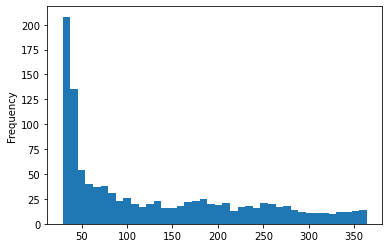

In [26]:
df1.VAL.plot.hist(bins=40)
plt.show()

Looks like an exponential distribution.

Let's pick samples from this distribution, record their means, and plot the sampling distribution.

In [27]:
samp_size = 50

In [28]:
sample_means = [df1.VAL.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

In [29]:
sample_means

0      117.44
1      148.48
2      117.28
3      153.36
4      145.36
        ...  
995    133.32
996    133.68
997    140.66
998    137.00
999    118.54
Length: 1000, dtype: float64

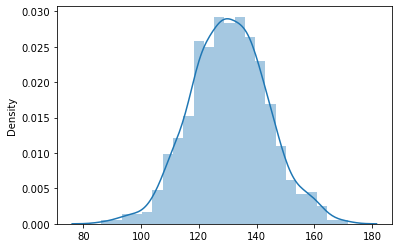

In [30]:
sns.distplot(sample_means)
plt.show()

In [31]:
sample_means.mean()

130.39213999999996

In [32]:
df1.VAL.mean()

130.4181654676259

In [33]:
sample_means.std()

13.263962580003142

In [34]:
df1.VAL.std()/np.sqrt(samp_size)

14.060457446377631

In [35]:
sample_means.describe()

count    1000.000000
mean      130.392140
std        13.263963
min        86.140000
25%       121.335000
50%       130.160000
75%       139.140000
max       171.480000
dtype: float64

### Effect of sample size

In [36]:
sample_sizes = [3, 10, 30, 50, 100, 200]

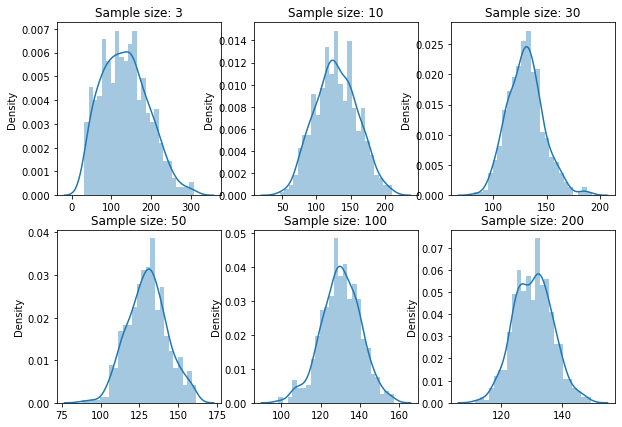

In [37]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df1.VAL.sample(samp_size).mean() for i in range(500)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=25)
    plt.title("Sample size: "+str(samp_size))
plt.show()

What is the significance of this, and why is it useful? Used in the industry?